In [ ]:
#hide
#all_slow

In [ ]:
#hide
#default_exp ml
import warnings
warnings.filterwarnings("ignore")
from nbdev.showdoc import show_doc
from IPython.display import HTML
%load_ext autoreload
%autoreload 2

# ml
>data processing and model training + analysis using machine learning

In [ ]:
#export
from glycowork.ml.model_training import *
#from glycowork.ml.models import *
#from glycowork.ml.processing import *
#from glycowork.ml.inference import *
from glycowork.ml.train_test_split import *
from glycowork.glycan_data.loader import df_species, df_glycan

`ml` contains the code base to process glycan for machine learning, construct state-of-the-art machine learning models, train them, and analyze trained models + glycan representations. It currently contains the following modules:

- `model_training` contains functions for training machine learning models
- `models` describes some examples for machine learning architectures applicable to glycans
- `processing` contains helper functions to prepare glycan data for model training
- `inference` can be used to analyze trained models, make predictions, or obtain glycan representations
- `train_test_split` contains various data split functions to get appropriate training and test sets

## model_training
>contains functions for training machine learning models

In [ ]:
show_doc(EarlyStopping)

<h2 id="EarlyStopping" class="doc_header"><code>class</code> <code>EarlyStopping</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/ml/model_training.py#L19" class="source_link" style="float:right">[source]</a></h2>

> <code>EarlyStopping</code>(**`patience`**=*`7`*, **`verbose`**=*`False`*)

Early stops the training if validation loss doesn't improve after a given patience.

In [ ]:
show_doc(train_model)

<h4 id="train_model" class="doc_header"><code>train_model</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/ml/model_training.py#L78" class="source_link" style="float:right">[source]</a></h4>

> <code>train_model</code>(**`model`**, **`dataloaders`**, **`criterion`**, **`optimizer`**, **`scheduler`**, **`num_epochs`**=*`25`*, **`patience`**=*`50`*, **`mode`**=*`'classification'`*, **`mode2`**=*`'multi'`*)

trains a deep learning model on predicting glycan properties

| Arguments:
| :-
| model (PyTorch object): graph neural network (such as SweetNet) for analyzing glycans
| dataloaders (PyTorch object): dictionary of dataloader objects with keys 'train' and 'val'
| criterion (PyTorch object): PyTorch loss function
| optimizer (PyTorch object): PyTorch optimizer
| scheduler (PyTorch object): PyTorch learning rate decay
| num_epochs (int): number of epochs for training; default:25
| patience (int): number of epochs without improvement until early stop; default:50
| mode (string): 'classification', 'multilabel', or 'regression'; default:classification
| mode2 (string): further specifying classification into 'multi' or 'binary' classification;default:multi

| Returns:
| :-
| Returns the best model seen during training

In [ ]:
show_doc(training_setup)

<h4 id="training_setup" class="doc_header"><code>training_setup</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/ml/model_training.py#L318" class="source_link" style="float:right">[source]</a></h4>

> <code>training_setup</code>(**`model`**, **`lr`**, **`lr_patience`**=*`4`*, **`factor`**=*`0.2`*, **`weight_decay`**=*`0.0001`*, **`mode`**=*`'multiclass'`*)

prepares optimizer, learning rate scheduler, and loss criterion for model training

| Arguments:
| :-
| model (PyTorch object): graph neural network (such as SweetNet) for analyzing glycans
| lr (float): learning rate
| lr_patience (int): number of epochs without validation loss improvement before reducing the learning rate;default:4
| factor (float): factor by which learning rate is multiplied upon reduction
| weight_decay (float): regularization parameter for the optimizer; default:0.001
| mode (string): 'multiclass': classification with multiple classes, 'multilabel': predicting several labels at the same time, 'binary':binary classification, 'regression': regression; default:'multiclass'

| Returns:
| :-
| Returns optimizer, learning rate scheduler, and loss criterion objects

In [ ]:
show_doc(train_ml_model)

<h4 id="train_ml_model" class="doc_header"><code>train_ml_model</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/ml/model_training.py#L357" class="source_link" style="float:right">[source]</a></h4>

> <code>train_ml_model</code>(**`X_train`**, **`X_test`**, **`y_train`**, **`y_test`**, **`mode`**=*`'classification'`*, **`feature_calc`**=*`False`*, **`libr`**=*`None`*, **`return_features`**=*`False`*, **`feature_set`**=*`['known', 'exhaustive']`*, **`additional_features_train`**=*`None`*, **`additional_features_test`**=*`None`*)

wrapper function to train standard machine learning models on glycans

| Arguments:
| :-
| X_train, X_test (list or dataframe): either lists of glycans (needs feature_calc = True) or motif dataframes such as from annotate_dataset
| y_train, y_test (list): lists of labels
| mode (string): 'classification' or 'regression'; default:'classification'
| feature_calc (bool): set to True for calculating motifs from glycans; default:False
| libr (list): sorted list of unique glycoletters observed in the glycans of our data; default:lib
| return_features (bool): whether to return calculated features; default:False
| feature_set (list): which feature set to use for annotations, add more to list to expand; default:['known','exhaustive']; options are: 'known' (hand-crafted glycan features), 'graph' (structural graph features of glycans), and 'exhaustive' (all mono- and disaccharide features)
| additional_features_train (dataframe): additional features (apart from glycans) to be used for training. Has to be of the same length as X_train; default:None
| additional_features_test (dataframe): additional features (apart from glycans) to be used for evaluation. Has to be of the same length as X_test; default:None

| Returns:
| :-
| Returns trained model                           

In [ ]:
vertebrate = [1 if k == 'Chordata' else 0 for k in df_species[df_species.Kingdom=='Animalia'].Phylum.values.tolist()]
X_train, X_test, y_train, y_test = general_split(df_species[df_species.Kingdom=='Animalia'].target.values.tolist(), vertebrate)
model_ft, _, X_test = train_ml_model(X_train, X_test, y_train, y_test, feature_calc = True, feature_set = ['exhaustive'],
                         return_features = True)


Calculating Glycan Features...

Training model...
[22:17:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Evaluating model...
Accuracy of trained model on separate validation set: 0.9302481556002683


In [ ]:
show_doc(analyze_ml_model)

<h4 id="analyze_ml_model" class="doc_header"><code>analyze_ml_model</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/ml/model_training.py#L423" class="source_link" style="float:right">[source]</a></h4>

> <code>analyze_ml_model</code>(**`model`**)

plots relevant features for model prediction

| Arguments:
| :-
| model (model object): trained machine learning model from train_ml_model

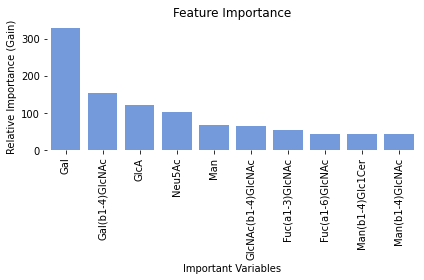

In [ ]:
analyze_ml_model(model_ft)

In [ ]:
show_doc(get_mismatch)

<h4 id="get_mismatch" class="doc_header"><code>get_mismatch</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/ml/model_training.py#L446" class="source_link" style="float:right">[source]</a></h4>

> <code>get_mismatch</code>(**`model`**, **`X_test`**, **`y_test`**, **`n`**=*`10`*)

analyzes misclassifications of trained machine learning model

| Arguments:
| :-
| model (model object): trained machine learning model from train_ml_model
| X_test (dataframe): motif dataframe used for validating model
| y_test (list): list of labels
| n (int): number of returned misclassifications; default:10

| Returns:
| :-
| Returns tuples of misclassifications and their predicted probability

In [ ]:
get_mismatch(model_ft, X_test, y_test)

[('Man(a1-3)Man(a1-6)Man(b1-4)GlcNAc(b1-4)GlcNAc', 0.4353863000869751),
 ('GalNAc(b1-3)Gal', 0.8447189331054688),
 ('Man(a1-3)Man(a1-6)Man(b1-4)GlcNAc(b1-4)GlcNAc', 0.4353863000869751),
 ('Fuc(a1-3)[GalNAc(b1-4)]GlcNAc(b1-2)Man(a1-3)[Man(a1-z)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
  0.3797847330570221),
 ('Man(a1-6)Man(a1-6)Man(b1-4)GlcNAc(b1-4)GlcNAc', 0.4353863000869751),
 ('Gal(a1-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Man(a1-3)[Man(a1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
  0.9270392656326294),
 ('Man(a1-6)[Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)GlcNAc', 0.13527607917785645),
 ('Fuc2S4S(a1-3)Fuc2S4S(a1-3)Fuc2S4S', 0.6127856373786926),
 ('Man(a1-3)[Gal(b1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc', 0.544141948223114),
 ('Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-6)GalNAc', 0.9209876656532288)]

## models
>describes some examples for machine learning architectures applicable to glycans. The main portal is prep_models which allows users to setup (trained) models by their string names

In [ ]:
#requires torch_geometric
#show_doc(SweetNet)

In [ ]:
#requires torch_geometric
#show_doc(LectinOracle)

In [ ]:
#requires torch_geometric
#show_doc(LectinOracle_flex)

In [ ]:
#requires torch_geometric
#show_doc(NSequonPred)

In [ ]:
#requires torch_geometric
#show_doc(init_weights)

In [ ]:
#requires torch_geometric
#show_doc(prep_model)

## processing
>contains helper functions to prepare glycan data for model training

In [ ]:
#requires torch_geometric
#show_doc(dataset_to_graphs)

In [ ]:
#requires torch_geometric
#show_doc(dataset_to_dataloader)

In [ ]:
#requires torch_geometric
#show_doc(split_data_to_train)

## inference
>can be used to analyze trained models, make predictions, or obtain glycan representations

In [ ]:
#requires torch_geometric
#show_doc(glycans_to_emb)

In [ ]:
#show_doc(get_lectin_preds)

In [ ]:
#show_doc(get_Nsequon_preds)

In [ ]:
#show_doc(get_esm1b_representations)

In order to run `get_esm1b_representations`, you first have to run this snippet:

`!pip install fair-esm
import esm
model, alphabet = esm.pretrained.esm1b_t33_650M_UR50S()`

## train_test_split
>contains various data split functions to get appropriate training and test sets

In [ ]:
show_doc(hierarchy_filter)

<h4 id="hierarchy_filter" class="doc_header"><code>hierarchy_filter</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/ml/train_test_split.py#L35" class="source_link" style="float:right">[source]</a></h4>

> <code>hierarchy_filter</code>(**`df_in`**, **`rank`**=*`'Domain'`*, **`min_seq`**=*`5`*, **`wildcard_seed`**=*`False`*, **`wildcard_list`**=*`None`*, **`wildcard_name`**=*`None`*, **`r`**=*`0.1`*, **`col`**=*`'target'`*)

stratified data split in train/test at the taxonomic level, removing duplicate glycans and infrequent classes

| Arguments:
| :-
| df_in (dataframe): dataframe of glycan sequences and taxonomic labels
| rank (string): which rank should be filtered; default:'domain'
| min_seq (int): how many glycans need to be present in class to keep it; default:5
| wildcard_seed (bool): set to True if you want to seed wildcard glycoletters; default:False
| wildcard_list (list): list which glycoletters a wildcard encompasses
| wildcard_name (string): how the wildcard should be named in the IUPAC-condensed nomenclature
| r (float): rate of replacement, default:0.1 or 10%
| col (string): column name for glycan sequences; default:target

| Returns:
| :-
| Returns train_x, val_x (lists of glycans (strings) after stratified shuffle split)
| train_y, val_y (lists of taxonomic labels (mapped integers))
| id_val (taxonomic labels in text form (strings))
| class_list (list of unique taxonomic classes (strings))
| class_converter (dictionary to map mapped integers back to text labels)

In [ ]:
train_x, val_x, train_y, val_y, id_val, class_list, class_converter = hierarchy_filter(df_species,
                                                                                       rank = 'Kingdom')
print(train_x[:10])

['Glc(b1-6)GlcNAc(a1-3)FucNAc(a1-3)GlcNAc(b1-2)Glc', 'Gal(b1-4)GlcNAc(b1-4)Man(a1-3)[Gal(b1-4)GlcNAc(b1-6)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc', 'D-Ara(a1-2)Gal(b1-3)Gal(b1-4)Man', 'GalfOAcOLac(b1-3)Glc(b1-6)GalfOAcOLac', 'Neu5Ac(a2-3)Gal(b1-4)GlcNAcOS(b1-6)[Gal(b1-3)]GalNAc', 'Gal(z1-z)GlcNAc(z1-z)Fuc', 'Gal4S(b1-3)[Fuc(a1-4)]GlcNAc(b1-2)Man(a1-3)[Man(a1-3)[Man(a1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc', 'GlcA(a1-2)[GlcN(a1-7)]LDManHep(a1-3)[GlcN(a1-4)[GalA6N(a1-6)]Glc(b1-4)]LDManHep(a1-5)KdoOPEtN', 'GalNAcAOAcN(a1-4)GalNFoAN(a1-3)QuiNAc(a1-3)Rha(a1-4)GalNAcAOAcN', 'Man(a1-2)Man(a1-3)Man(a1-3)[Man(a1-2)Man(a1-3)[Man(a1-2)Man(a1-6)]Man(a1-6)]Man(b1-4)GlcNAc']


In [ ]:
show_doc(general_split)

<h4 id="general_split" class="doc_header"><code>general_split</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/ml/train_test_split.py#L108" class="source_link" style="float:right">[source]</a></h4>

> <code>general_split</code>(**`glycans`**, **`labels`**, **`test_size`**=*`0.2`*)

splits glycans and labels into train / test sets

| Arguments:
| :-
| glycans (list): list of IUPAC-condensed glycan sequences as strings
| labels (list): list of labels used for prediction
| test_size (float): % size of test set; default:0.2 / 20%

| Returns:
| :-
| Returns X_train, X_test, y_train, y_test

In [ ]:
train_x, val_x, train_y, val_y = general_split(df_species.target.values.tolist(),
                                              df_species.Species.values.tolist())
print(train_x[:10])

['Rha(a1-3)ManNAc(b1-4)Rha', 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)DDManHep(a1-6)Glc(b1-4)[LDManHep(a1-2)LDManHep(a1-3)]LDManHep(a1-5)Kdo', 'Rha(a1-3)Rha(b1-4)[Rha(a1-2)]Rha(b1-4)Rha(a1-3)Rha', 'Fuc(a1-2)Gal(b1-z)GlcNAc(b1-3)[Fuc(a1-2)[GalNAc(a1-3)]Gal(b1-4)GlcNAc(b1-6)]Gal(b1-z)GlcNAc(b1-3)Gal(b1-3)[Fuc(a1-2)[GalNAc(a1-3)]Gal(b1-4)GlcNAc(b1-6)]GalNAc', 'Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc', 'Glc6Ac(b1-2)Glc1Ole6Ac', 'Araf(a1-2)Xyl(a1-6)Glc(b1-4)[Araf(a1-2)Xyl(a1-6)]Glc(b1-4)Glc(b1-4)Glc-ol', 'Glc(b1-3)Gal(a1-3)[Gal(b1-4)]Rha2Ac(b1-4)Rha(a1-4)GlcA(b1-3)[Glc(a1-2)]Galf(b1-3)Glc', 'GlcNAcOS(b1-2)[GlcNAc(b1-4)]Man(a1-3)[GlcNAcOS(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc', 'GlcNAc(b1-4)GlcA(b1-3)GlcNAc']


In [ ]:
show_doc(prepare_multilabel)

<h4 id="prepare_multilabel" class="doc_header"><code>prepare_multilabel</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/ml/train_test_split.py#L122" class="source_link" style="float:right">[source]</a></h4>

> <code>prepare_multilabel</code>(**`df`**, **`rank`**=*`'Species'`*, **`glycan_col`**=*`'target'`*)

converts a one row per glycan-species/tissue/disease association file to a format of one glycan - all associations

| Arguments:
| :-
| df (dataframe): dataframe where each row is one glycan - species association
| rank (string): which label column should be used; default:Species
| glycan_col (string): column name of where the glycan sequences are stored; default:target

| Returns:
| :-
| (1) list of unique glycans in df
| (2) list of lists, where each inner list are all the labels of a glycan

In [ ]:
#hide
from nbdev.export import notebook2script; notebook2script()

Converted 00_core.ipynb.
Converted 01_glycan_data.ipynb.
Converted 02_ml.ipynb.
Converted 03_motif.ipynb.
Converted 04_network.ipynb.
Converted 05_examples.ipynb.
Converted index.ipynb.
